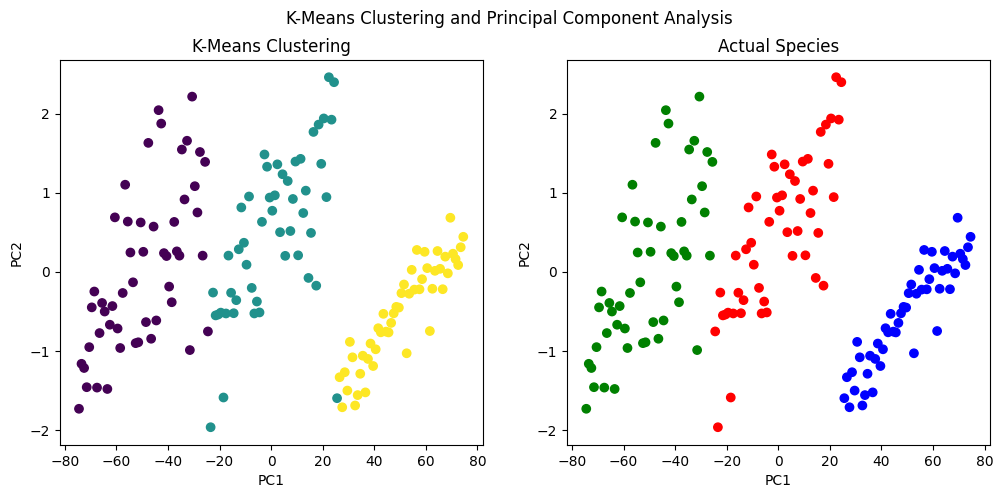

Eigenvalues: [1.89078098e+03 9.73286632e-01 2.22994729e-01]


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def preprocess_data(dataset):
    # Load the dataset
    data = pd.read_csv(dataset)
    
    # Remove the "Species" column and store it for future comparison
    species = data['Species']
    data = data.drop('Species', axis=1)
    
    return data, species

def kmeans_clustering(data, k, max_iterations=100):
    # Convert the dataframe to a numpy array
    X = data.values
    
    # Randomly initialize the centroids
    np.random.seed(0)
    centroids = X[np.random.choice(range(X.shape[0]), k, replace=False)]
    
    for _ in range(max_iterations):
        # Calculate the distances between each data point and centroids
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1)
        
        # Assign each data point to the closest centroid
        labels = np.argmin(distances, axis=1)
        
        # Update the centroids based on the mean of the assigned data points
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check if the centroids have converged
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels

def pca(data):
    # Center the data
    centered_data = data - data.mean(axis=0)
    
    # Calculate the covariance matrix
    cov_matrix = np.cov(centered_data.T)
    
    # Perform eigendecomposition of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Project the data onto the first three eigenvectors
    projected_data = centered_data.dot(eigenvectors[:, :3])
    
    return projected_data, eigenvalues[:3]

def plot_results(projected_data, cluster_labels, species):
    # Plot the K-Means Clustering output
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle('K-Means Clustering and Principal Component Analysis')

    axes[0].scatter(projected_data.iloc[:, 0], projected_data.iloc[:, 1], c=cluster_labels)
    axes[0].set_xlabel('PC1')
    axes[0].set_ylabel('PC2')
    axes[0].set_title('K-Means Clustering')

    # Plot the actual species
    species_colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'red', 'Iris-virginica': 'green'}
    species_labels = species.map(species_colors)
    axes[1].scatter(projected_data.iloc[:, 0], projected_data.iloc[:, 1], c=species_labels)
    axes[1].set_xlabel('PC1')
    axes[1].set_ylabel('PC2')
    axes[1].set_title('Actual Species')

    plt.show()



# Preprocess the data
data, species = preprocess_data('/content/Iris.csv')

# Perform K-Means Clustering
k = 3
cluster_labels = kmeans_clustering(data, k)

# Perform Principal Component Analysis
projected_data, eigenvalues = pca(data)

# Plot the results
plot_results(projected_data, cluster_labels, species)

# Print the eigenvalues for the first three eigenvectors
print('Eigenvalues:', eigenvalues)
